<a href="https://colab.research.google.com/github/pumazzo/corso_AML_2025/blob/main/notebooks/es0/Lesson_0_HAUFE2014_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.linear_model import LogisticRegression


In the following, non-scalar values are highlighted in **bold**, and we denote random variables by  
upper-case symbols, e.g., `Z`, whereas lower-case analogs, e.g., `z`, represent their respective realizations.  

### Example A  
In Haufe et al. (2014), the two-dimensional classification problem  

$$
X = aZ + H, \quad Y = Z
$$

is introduced, with  

$$
a = (1, 0)^\top, \quad Z \sim \text{Rademacher}(1/2), \quad H \sim \mathcal{N}(0, \Sigma)
$$

with covariance  

$$
\Sigma =
\begin{bmatrix}
s_1^2 & c s_1 s_2 \\
c s_1 s_2 & s_2^2
\end{bmatrix},
$$

where \( s_1 \) and \( s_2 \) are non-negative standard deviations, and \( c \in [-1, 1] \) is a correlation.  

In this example, only feature \( X_1 \) is correlated with the classification target \( Y = Z \) through \( a_1 = 1 \).  
In contrast, \( X_2 \) is independent of \( Y \) since \( a_2 = 0 \). Both features are correlated through  
the superposition of additive noise \( H \) with covariance \( \Sigma \). A depiction of data generated  
under the model is provided in **Figure 1 (a/b) in Appendix A**.  

For \( c \neq 0 \), the Bayes-optimal bivariate linear classification model  

$$
f_{w,b}(x) = w^\top x + b
$$

can reduce the contribution of \( H \) from \( X_1 \) using information contained in \( X_2 \),  
and thereby estimate \( y \) as \( \hat{y} = f_{w,b}(x) \) more precisely


In [ ]:
#
dataset = "A"
N=8000
if dataset == "A":

  a = np.array([0,1]).T
  s1,s2,c = 0.9,0.7,0.5
  S = np.zeros((2,2))
  S[0,0] = s1**2;S[0,1]=c*s1*s2;S[1,0]=c*s1*s2;S[1,1] = s2**2
  H = np.random.multivariate_normal(np.zeros(2),S,N)
  Y =np.random.randint(0,2, size=(N))
  Z = Y -1/2
  X = a*np.expand_dims(Z,1) + H
else:

  # example B

  Y = np.random.randn(N)#np.random.randint(0,2, size=(N))
  X = np.random.randn(N,2)
  X[:,0]  = Y - X[:,1]

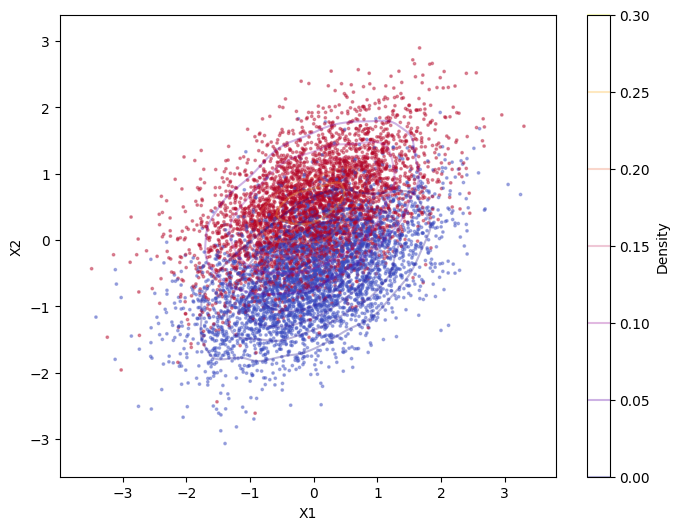

In [ ]:


# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=3, cmap='coolwarm', alpha=0.4)
plt.xlabel('X1')
plt.ylabel('X2')
if dataset == "A":
  # Create a density plot using KDE
  kde0 = gaussian_kde(X[Y==0].T)  # Compute KDE
  kde1 = gaussian_kde(X[Y==1].T)  # Compute KDE
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  grid_points = np.vstack([xx.ravel(), yy.ravel()])
  density0 = kde0(grid_points).reshape(xx.shape)  # Evaluate KDE on grid
  density1 = kde1(grid_points).reshape(xx.shape)  # Evaluate KDE on grid
    # Add density contours
  plt.contour(xx, yy, density0, levels=5, cmap="plasma",alpha=0.3,vmin = 0, vmax=4)
  plt.contour(xx, yy, density1, levels=5, cmap="plasma",alpha=0.3)



plt.colorbar(label="Density")

plt.show()


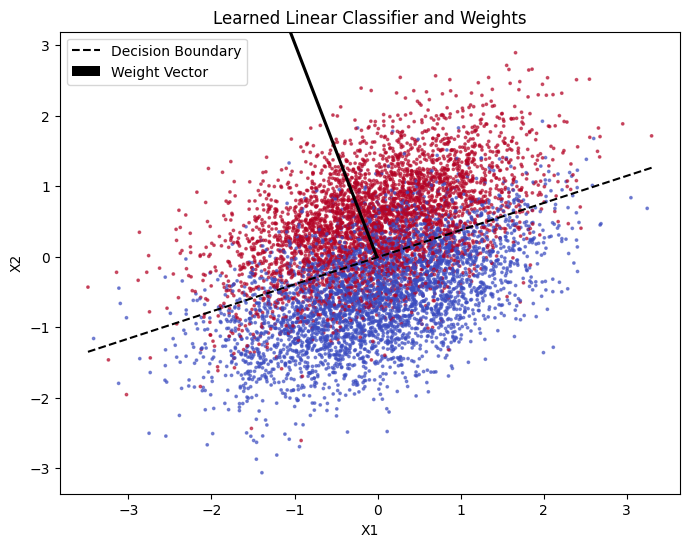

In [ ]:

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, Y)

# Get learned weights
w = clf.coef_[0]  # Extract weight vector
b = clf.intercept_[0]

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=3, cmap='coolwarm', alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Learned Linear Classifier and Weights')

# Plot decision boundary
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]  # Solve for y in w1*x + w2*y + b = 0
plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

# Plot learned weight vector
origin = np.mean(X, axis=0)  # Center arrow at mean of X
plt.quiver(*origin, *w, scale=0.01, color='black', width=0.005, label="Weight Vector")

plt.legend()
plt.show()


In [ ]:
w

array([-1.07037165,  2.78311428])

In [ ]:
accuracies = []
Ws = []
Cs = np.linspace(-0.99,0.99,50)
for C in Cs:
  N=20000
  a = np.array([0,1]).T
  s1,s2,c = 0.9,0.7,C
  S = np.zeros((2,2))
  S[0,0] = s1**2;S[0,1]=c*s1*s2;S[1,0]=c*s1*s2;S[1,1] = s2**2
  H = np.random.multivariate_normal(np.zeros(2),S,N)
  Y =np.random.randint(0,2, size=(N))
  Z = Y -1/2
  X = a*np.expand_dims(Z,1) + H

  #train test split
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  # Train a logistic regression classifier
  clf = LogisticRegression()
  clf.fit(X_train, Y_train)
  accuracy = clf.score(X_test, Y_test)
  accuracies.append(accuracy)

  # Get learned weights
  w = clf.coef_[0]  # Extract weight vector
  b = clf.intercept_[0]
  Ws.append(w/np.linalg.norm(w))

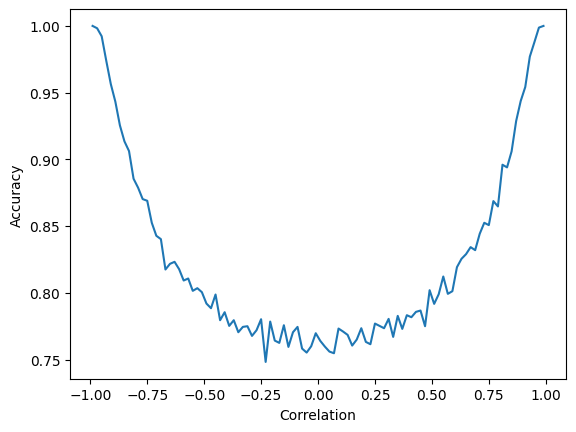

In [ ]:
plt.plot(Cs,accuracies)
plt.xlabel("Correlation")
plt.ylabel("Accuracy")
plt.show()

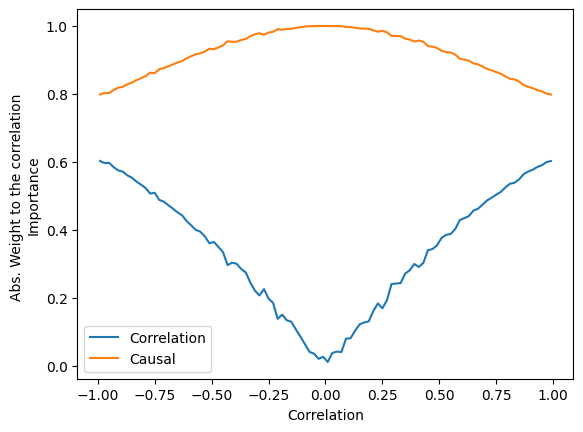

In [ ]:
plt.plot(Cs,np.absolute(np.array(Ws)[:,0]),label="Correlation")
plt.plot(Cs,np.absolute(np.array(Ws)[:,1]),label="Causal")
plt.xlabel("Correlation")
plt.ylabel(f"Abs. Weight to the correlation \nImportance")
plt.legend()
plt.show()